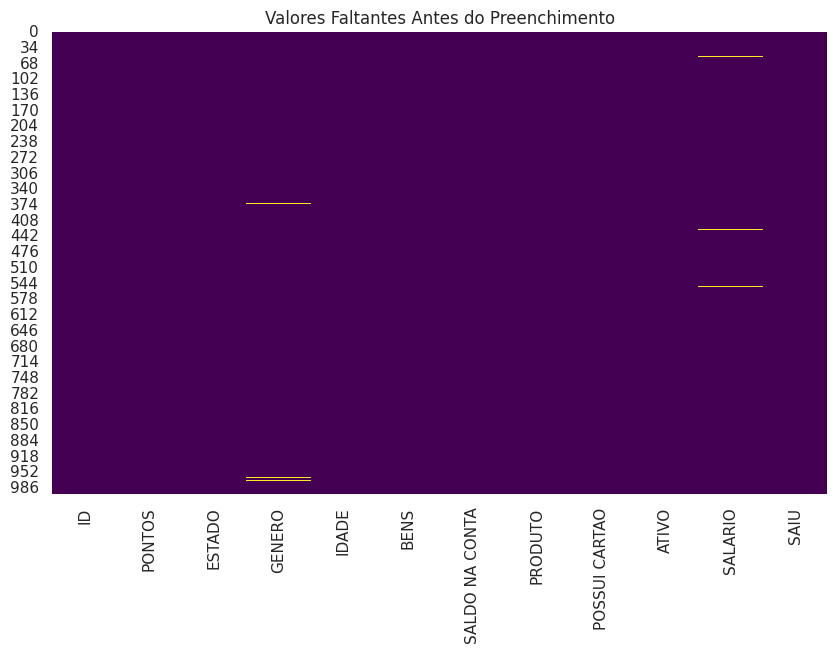

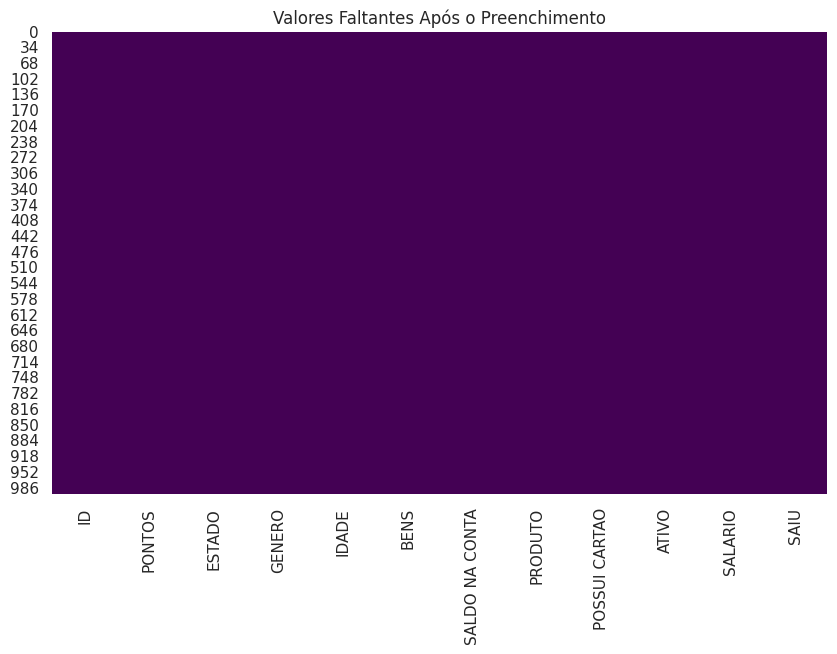

<ipython-input-8-45f3887eefd2>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GENERO'] = data['GENERO'].replace({'Mas': 'Masculino', 'Fem': 'Feminino'})


Contagem de clientes por gênero:
GENERO
F              2
Feminino     461
M              6
Masculino    529
dtype: int64
Contagem de clientes por estado:
ESTADO
BA     14
CE    505
MA    462
MG      9
RJ      4
SP      4
dtype: int64
Resumo estatístico dos dados numéricos:
                ID      PONTOS       IDADE        BENS  SALDO NA CONTA  \
count   998.000000  998.000000  998.000000  998.000000    9.980000e+02   
mean    501.337675  648.605210   38.012024    5.073146    7.162423e+06   
std     288.500953   98.312117    8.631882    2.926320    6.314508e+06   
min       1.000000  376.000000   18.000000    0.000000    0.000000e+00   
25%     252.250000  580.000000   32.000000    2.000000    0.000000e+00   
50%     501.500000  653.000000   37.000000    5.000000    8.926348e+06   
75%     750.750000  721.000000   43.000000    8.000000    1.258767e+07   
max    1000.000000  850.000000   62.000000   10.000000    2.117743e+07   

          PRODUTO  POSSUI CARTAO      ATIVO       SALARIO  

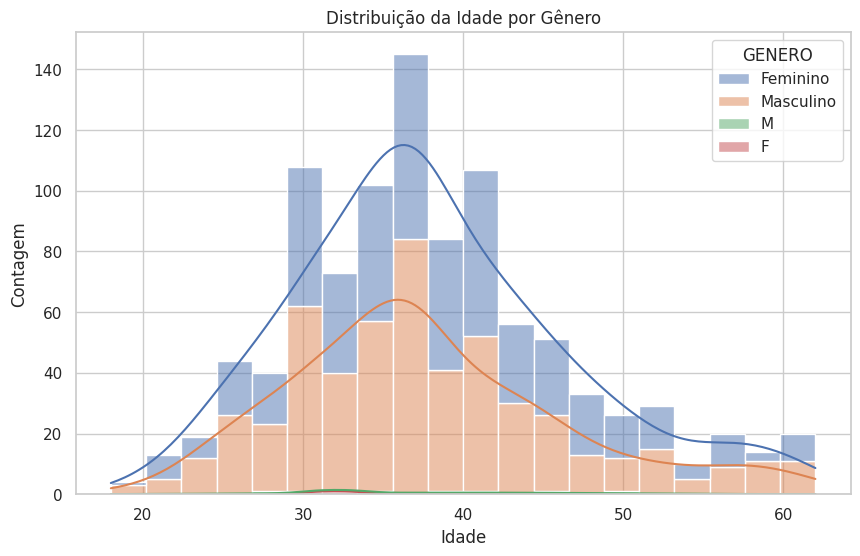

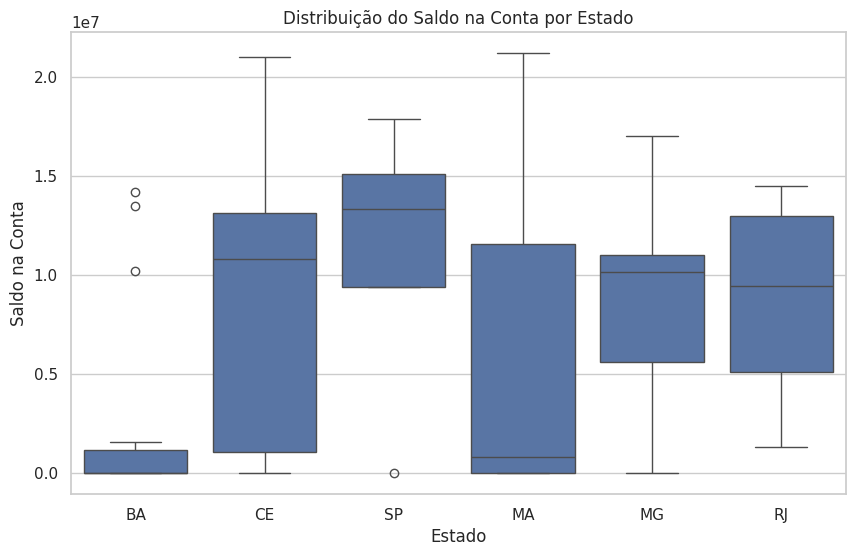

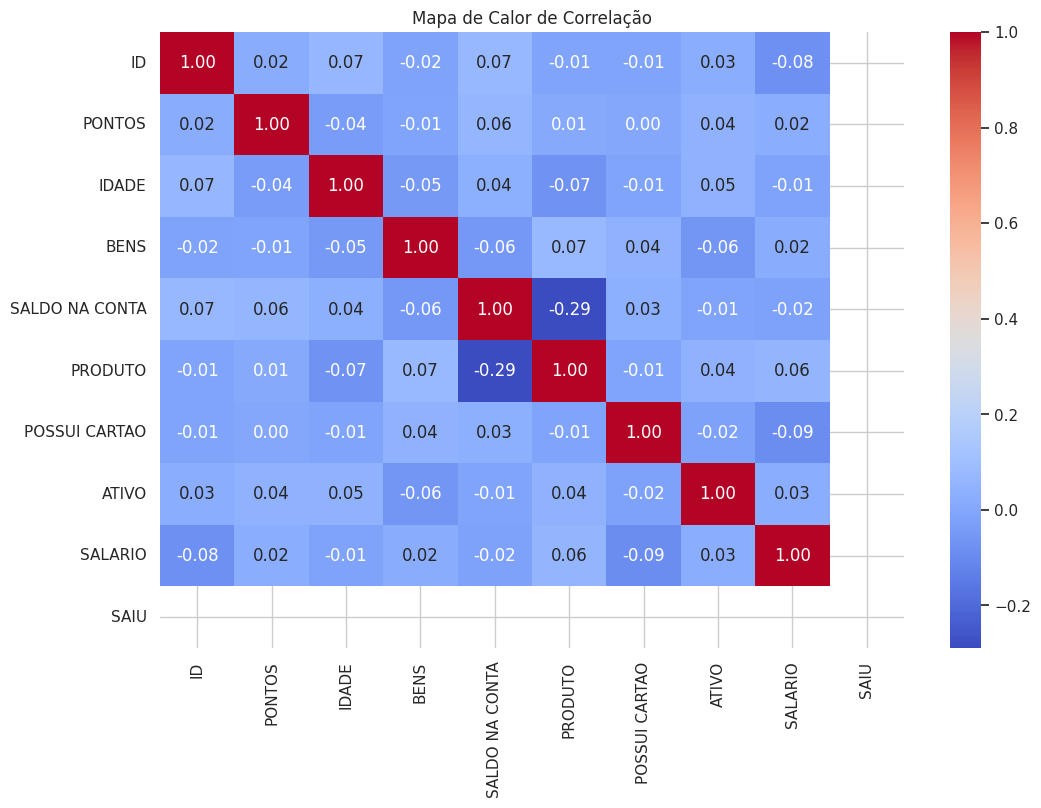

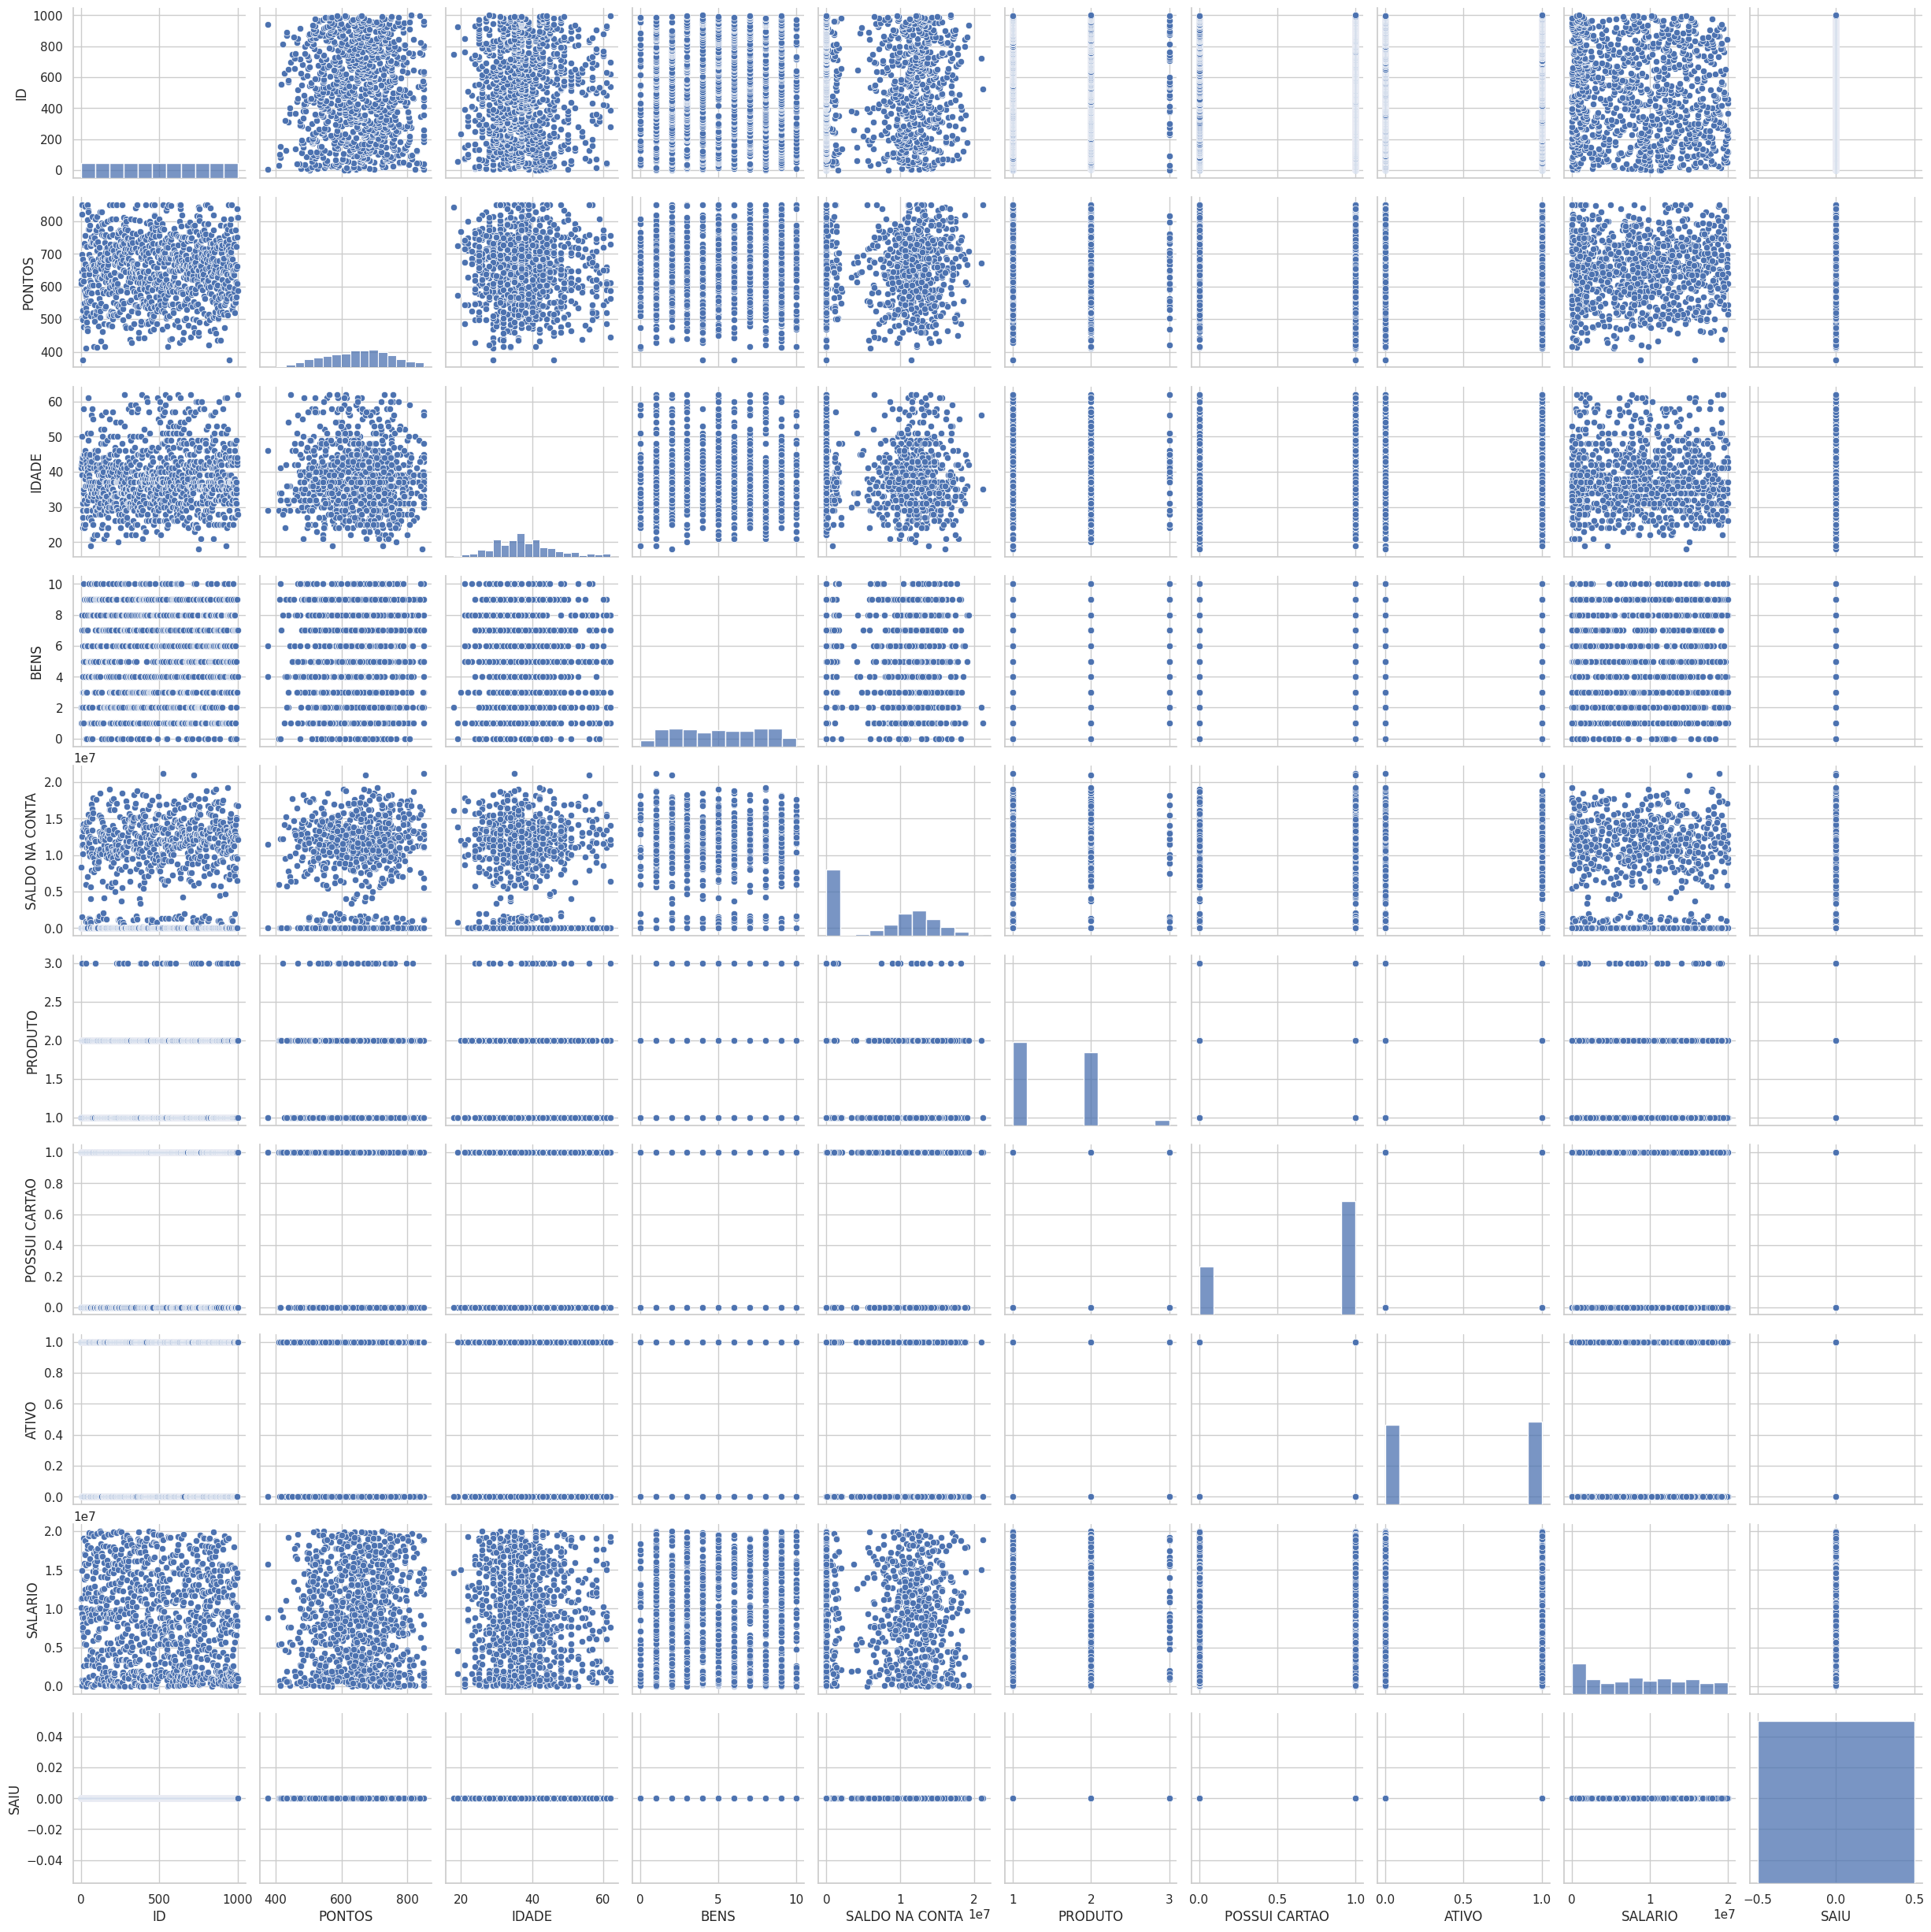

Insights e Recomendações:
1. A maioria dos clientes são do gênero feminino.
2. O estado com maior número de clientes é 'CE'.
3. A idade média dos clientes está na faixa dos 40 anos.
4. Há uma alta correlação entre 'SALARIO' e 'SALDO NA CONTA', sugerindo que clientes com salários mais altos tendem a ter saldos maiores.
5. Recomenda-se focar em campanhas para o público feminino e explorar mais o mercado no estado 'BA', que apresenta um bom número de clientes.


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configurações para visualizações
sns.set(style="whitegrid")

# Carregar a planilha
file_path = '/content/Planilha do desafio 5 - Ciência de dados - Relatório do Banco x.csv'
data = pd.read_csv(file_path)

# 1. Substituir o cabeçalho por palavras em letras maiúsculas
data.columns = [col.upper() for col in data.columns]

# 2. Corrigir os dados faltantes e preencher as lacunas com valores adequados
# Visualizar valores faltantes antes de preencher
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Valores Faltantes Antes do Preenchimento")
plt.show()

# Preencher NaNs com valores adequados
data = data.fillna(data.mean(numeric_only=True))
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Visualizar valores faltantes após o preenchimento
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Valores Faltantes Após o Preenchimento")
plt.show()

# 3. Eliminar os outliers, atribuindo no lugar deles os valores adequados
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Usar IQR para identificar outliers
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Função para substituir outliers
def replace_outliers_with_median(data, col):
    median = data[col].median()
    data[col] = data[col].apply(lambda x: median if (x < (Q1[col] - 1.5 * IQR[col])) or (x > (Q3[col] + 1.5 * IQR[col])) else x)

for col in numerical_columns:
    replace_outliers_with_median(data, col)

# 4. Eliminar os duplicados, para garantir a unicidade das informações
data = data.drop_duplicates()

# 5. Substituir os NANs por valores adequados (já feito no passo 2)

# 6. Corrigir dados categóricos
data['GENERO'] = data['GENERO'].replace({'Mas': 'Masculino', 'Fem': 'Feminino'})

# 7. Visualizações e análises adicionais para exploração de dados

# Analisar dados categóricos usando groupby()
# Contagem de clientes por gênero
grouped_data_genero = data.groupby('GENERO').size()
print("Contagem de clientes por gênero:")
print(grouped_data_genero)

# Contagem de clientes por estado
grouped_data_estado = data.groupby('ESTADO').size()
print("Contagem de clientes por estado:")
print(grouped_data_estado)

# Analisar dados numéricos usando describe()
# Resumo estatístico dos dados numéricos
print("Resumo estatístico dos dados numéricos:")
print(data.describe())

# Visualizar distribuição da idade por gênero
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='IDADE', hue='GENERO', multiple='stack', kde=True)
plt.title("Distribuição da Idade por Gênero")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.show()

# Visualizar distribuição do saldo na conta por estado
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='ESTADO', y='SALDO NA CONTA')
plt.title("Distribuição do Saldo na Conta por Estado")
plt.xlabel("Estado")
plt.ylabel("Saldo na Conta")
plt.show()

# Análise de correlação
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlação")
plt.show()

# Análise de pairplot para ver as relações entre variáveis
sns.pairplot(numeric_data)
plt.show()

# Insights baseados nas análises
print("Insights e Recomendações:")
print("1. A maioria dos clientes são do gênero feminino.")
print("2. O estado com maior número de clientes é 'CE'.")
print("3. A idade média dos clientes está na faixa dos 40 anos.")
print("4. Há uma alta correlação entre 'SALARIO' e 'SALDO NA CONTA', sugerindo que clientes com salários mais altos tendem a ter saldos maiores.")
print("5. Recomenda-se focar em campanhas para o público feminino e explorar mais o mercado no estado 'BA', que apresenta um bom número de clientes.")